In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#loading dataset
df=pd.read_csv("House_Price_Data.csv")

In [4]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14119 entries, 0 to 14118
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   bhk           14119 non-null  int64 
 1   propertytype  14119 non-null  object
 2   location      14119 non-null  object
 3   sqft          14119 non-null  int64 
 4   pricepersqft  14119 non-null  int64 
 5   totalprice    14119 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 662.0+ KB


,bhk,propertytype,location,sqft,pricepersqft,totalprice
0,3,Flat,Ahmedabad,1346,6233,15700000
1,4,Flat,Ahmedabad,1872,4873,17500000
2,4,Flat,Ahmedabad,1650,6733,20200000
3,5,Flat,Ahmedabad,10201,8499,86700000
4,3,Flat,Ahmedabad,968,5944,10400000


In [5]:
df.describe()

,bhk,sqft,pricepersqft,totalprice
count,14119.000000,14119.000000,1.411900e+04,1.411900e+04
mean,2.709824,1562.767122,1.218960e+04,1.276700e+07
std,0.787175,8207.723233,2.599234e+05,2.111962e+07
min,1.000000,5.000000,2.100000e+01,1.100000e+05
25%,2.000000,916.000000,4.000000e+03,4.500000e+06
50%,3.000000,1210.000000,5.526000e+03,7.500000e+06
75%,3.000000,1620.000000,8.929000e+03,1.410000e+07
max,10.000000,799284.000000,2.000000e+07,8.686000e+08


In [ ]:
df.isnull().sum()
#no null value, so there is no need to drop any value


bhk             0
propertytype    0
location        0
sqft            0
pricepersqft    0
totalprice      0
dtype: int64

In [ ]:
#exploring unique values
print("Unique BHKs:", df['bhk'].unique())
print("Unique Property Types:", df['propertytype'].unique())
print("Unique Locations:", df['location'].nunique())

Unique BHKs: [ 3  4  5  2  6  1 10  7  8  9]
Unique Property Types: ['Flat' 'Villa' 'House']
Unique Locations: 56


In [17]:
#removing outliers
df = df[df['sqft'] > 300]
df = df[df['totalprice'] < 10**8]
df = df[df['totalprice'] / df['sqft'] > 500]    # ₹ per sqft > 500
df = df[df['totalprice'] / df['sqft'] < 10000]
df['location'].value_counts().head(10) # Top 10 locations by data count
#keep only flat propertytype for simplicity
df = df[df['propertytype'] == 'Flat']


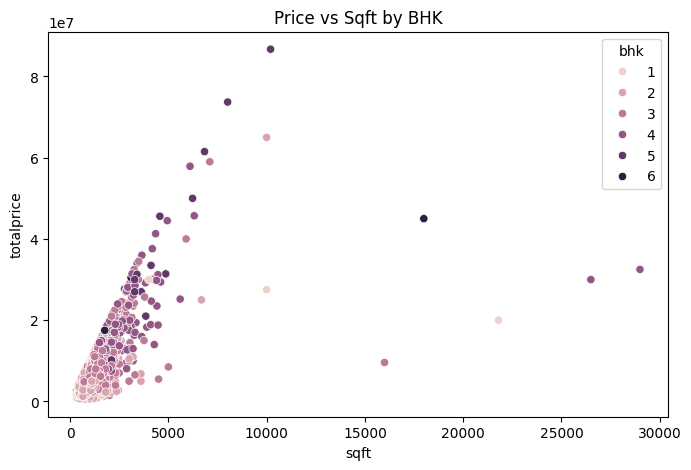

In [18]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=df,x='sqft',y='totalprice',hue='bhk')
plt.title('Price vs Sqft by BHK')
plt.show()

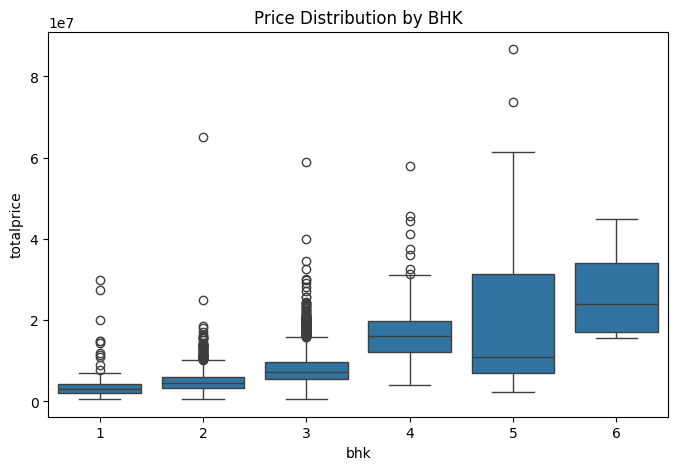

In [19]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='bhk', y='totalprice')
plt.title('Price Distribution by BHK')
plt.show()


In [20]:
#cleaning saved data for model training
df.to_csv('cleaned_data.csv',index=False)
print("✅ Data cleaned and saved as cleaned_data.csv")


✅ Data cleaned and saved as cleaned_data.csv
